```f(x) = x**2 - 6*abs(x) + 8```

* Определить корни

* Найти интервалы, на которых функция возрастает

* Найти интервалы, на которых функция убывает

* Построить график

* Вычислить вершину

* Определить промежутки, на котором f(x) > 0

* Определить промежутки, на котором f(x) < 0

In [1]:
from sympy import *

In [2]:
x = Symbol('x', real=True)

In [3]:
y = x ** 2 - 6 * abs(x) + 8
y

x**2 - 6*Abs(x) + 8

Область определения функции

In [4]:
Reals - singularities(y, x)

Reals

**Определить корни**

In [5]:
roots_y = solve(y)
roots_y

[-4, -2, 2, 4]

**Построить график**

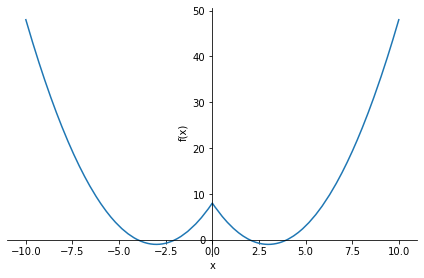

In [6]:
g_y = plot(y)

Находим производную функции для нахождения экстремумов

In [7]:
d = diff(y)
d

2*x - 6*sign(x)

Находим корни производной - точки экстремума

In [8]:
roots_d = solve(d)
roots_d

[3]

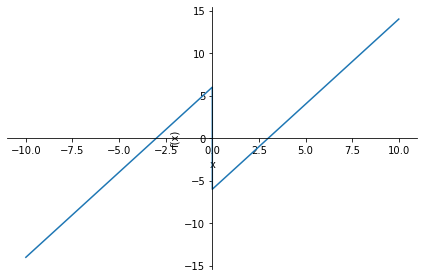

In [9]:
g_d = plot(d)

Исходя из графика и учитывая ```|x|``` в функции, производная равна нулю в двух точках ```3``` и ```-3```, так же в точке ```x=0``` функция имеет излом, который не является экстремумом, но необходим для исследования функции.
Добавляем недостающие точки в корни производной

In [10]:
roots_d.append(roots_d[0] * -1)
roots_d.append(0)
roots_d = sorted(roots_d)
roots_d

[-3, 0, 3]

In [11]:
# Функция принимает корни уравнения
# и создаёт промежутки для исследования функции
def make_intervals(roots):
    intervals = []
    intervals.append([roots[0]-1, roots[0]])
    for i in range(len(roots)-1):
        r = [roots[i], roots[i+1]]
        intervals.append(r)
    intervals.append([roots[-1], roots[-1]+1])
    return intervals

**Вычислить вершины**

In [12]:
print(f'Точки экстремума функции {roots_d[0]}, {roots_d[-1]}')

Точки экстремума функции -3, 3


In [13]:
for i in roots_d:
    left_val = i-0.01 if i == 0 else i-0.01*abs(i)
    right_val = i+0.01 if i == 0 else i+0.01*abs(i)
    if d.evalf(subs={x: left_val}) < d.evalf(subs={x: i}) and d.evalf(subs={x: right_val}) > d.evalf(subs={x: i}):
        print(f'точка минимума ⋁ - "{i}"')
    else:
        print(f'точка максимума ⋀ - "{i}"')

точка минимума ⋁ - "-3"
точка максимума ⋀ - "0"
точка минимума ⋁ - "3"


**Интервалы на которых функция возрастает/убывает**

In [14]:
intervals = make_intervals(roots_d)

In [15]:
for i in intervals:
    start_int = -oo if intervals.index(i) == 0 else i[0]
    end_int = oo if intervals.index(i) == len(intervals)-1 else i[1]
    if d.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'⮝ Функция возрастает на промежутке {start_int, end_int}')
    else:
        print(f'⮟ Функция убывает на промежутке {start_int, end_int}')

⮟ Функция убывает на промежутке (-oo, -3)
⮝ Функция возрастает на промежутке (-3, 0)
⮟ Функция убывает на промежутке (0, 3)
⮝ Функция возрастает на промежутке (3, oo)


**Определить промежутки, на которых ```f(x) > 0``` и ```f(x) < 0```**

In [16]:
intervals = make_intervals(roots_y)

In [17]:
for i in intervals:
    start_int = -oo if intervals.index(i) == 0 else i[0]
    end_int = oo if intervals.index(i) == len(intervals)-1 else i[1]
    if y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'f(x) > 0 на промежутке {start_int, end_int}')
    else:
        print(f'f(x) < 0 на промежутке {start_int, end_int}')

f(x) > 0 на промежутке (-oo, -4)
f(x) < 0 на промежутке (-4, -2)
f(x) > 0 на промежутке (-2, 2)
f(x) < 0 на промежутке (2, 4)
f(x) > 0 на промежутке (4, oo)
